In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = "clean.xlsx"
df = pd.read_excel(file_path)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,profit_margin
0,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,0.332278
1,22254,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,0.277723
2,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,-0.580742
3,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Unknown,Consumer,NaN,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",0.000,2,0.0,106.140,35.46,Medium,0.000000
4,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",0.000,3,0.1,36.036,9.72,Medium,0.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50306 entries, 0 to 50305
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          50306 non-null  int64         
 1   order_id        50306 non-null  object        
 2   order_date      50306 non-null  datetime64[ns]
 3   ship_date       50306 non-null  datetime64[ns]
 4   ship_mode       50306 non-null  object        
 5   customer_id     50306 non-null  object        
 6   customer_name   50306 non-null  object        
 7   segment         50306 non-null  object        
 8   postal_code     9794 non-null   float64       
 9   city            50306 non-null  object        
 10  state           50306 non-null  object        
 11  country         50306 non-null  object        
 12  region          50306 non-null  object        
 13  market          50306 non-null  object        
 14  product_id      50306 non-null  object        
 15  ca

In [ ]:

df = df.drop(columns=['order_id', 'customer_name', 'order_date', 'postal_code', 'product_name','ship_date'])

print("Missing values before cleaning:", df.isnull().sum())

df = df.dropna(subset=['sales'])

df = df.fillna(0)
df.head()

Missing values before cleaning: row_id            0
ship_mode         0
customer_id       0
segment           0
city              0
state             0
country           0
region            0
market            0
product_id        0
category          0
sub-category      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
profit_margin     0
dtype: int64


,row_id,ship_mode,customer_id,segment,city,state,country,region,market,product_id,category,sub-category,sales,quantity,discount,profit,shipping_cost,order_priority,profit_margin
0,22255,Standard Class,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,113.670,5,0.1,37.770,4.70,Medium,0.332278
1,22254,Standard Class,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-PA-3990,Office Supplies,Paper,55.242,2,0.1,15.342,1.80,Medium,0.277723
2,11731,Second Class,EM-14140124,Home Office,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,44.865,3,0.5,-26.055,4.82,High,-0.580742
3,42433,Standard Class,TB-112803,Consumer,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,0.000,2,0.0,106.140,35.46,Medium,0.000000
4,22253,Standard Class,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,0.000,3,0.1,36.036,9.72,Medium,0.000000


In [ ]:

df = pd.get_dummies(df, columns=['category', 'region', 'ship_mode'], drop_first=True)

df

,row_id,customer_id,segment,city,state,country,market,product_id,sub-category,sales,...,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class
0,22255,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,FUR-FU-4075,Furnishings,113.670,...,False,False,False,False,False,False,False,False,False,True
1,22254,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,OFF-PA-3990,Paper,55.242,...,False,False,False,False,False,False,False,False,False,True
2,11731,EM-14140124,Home Office,Stockholm,Stockholm,Sweden,Europe,OFF-PA-4177,Paper,44.865,...,False,False,False,False,False,False,False,False,True,False
3,42433,TB-112803,Consumer,Constantine,Constantine,Algeria,Africa,OFF-ST-6261,Storage,0.000,...,False,False,False,False,False,False,False,False,False,True
4,22253,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,OFF-SU-3002,Supplies,0.000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50301,1785,EB-1397518,Corporate,São Paulo,São Paulo,Brazil,LATAM,OFF-BI-3187,Binders,0.000,...,False,False,False,False,False,False,False,False,True,False
50302,50446,JA-5970129,Consumer,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,OFF-ST-4264,Storage,0.000,...,False,False,False,False,False,False,False,False,False,False
50303,8855,CM-1219093,Consumer,Managua,Managua,Nicaragua,LATAM,TEC-PH-5346,Phones,0.000,...,False,False,False,False,False,False,False,False,True,False
50304,23682,BS-1136558,Corporate,Vijayawada,Andhra Pradesh,India,Asia Pacific,OFF-ST-5688,Storage,0.000,...,True,False,False,False,False,False,False,False,True,False


In [ ]:

X = df.drop(columns=['sales'])
y = df['sales']
print(y.head())
X.head()

0    113.670
1     55.242
2     44.865
3      0.000
4      0.000
Name: sales, dtype: float64


,row_id,customer_id,segment,city,state,country,market,product_id,sub-category,quantity,...,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class
0,22255,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,FUR-FU-4075,Furnishings,5,...,False,False,False,False,False,False,False,False,False,True
1,22254,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,OFF-PA-3990,Paper,2,...,False,False,False,False,False,False,False,False,False,True
2,11731,EM-14140124,Home Office,Stockholm,Stockholm,Sweden,Europe,OFF-PA-4177,Paper,3,...,False,False,False,False,False,False,False,False,True,False
3,42433,TB-112803,Consumer,Constantine,Constantine,Algeria,Africa,OFF-ST-6261,Storage,2,...,False,False,False,False,False,False,False,False,False,True
4,22253,JH-159857,Consumer,Wagga Wagga,New South Wales,Australia,Asia Pacific,OFF-SU-3002,Supplies,3,...,False,False,False,False,False,False,False,False,False,True


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LinearRegression()
model.fit(X_train.select_dtypes(include=['float64','int64']), y_train)
y_pred = model.predict(X_test.select_dtypes(include=['float64','int64']))


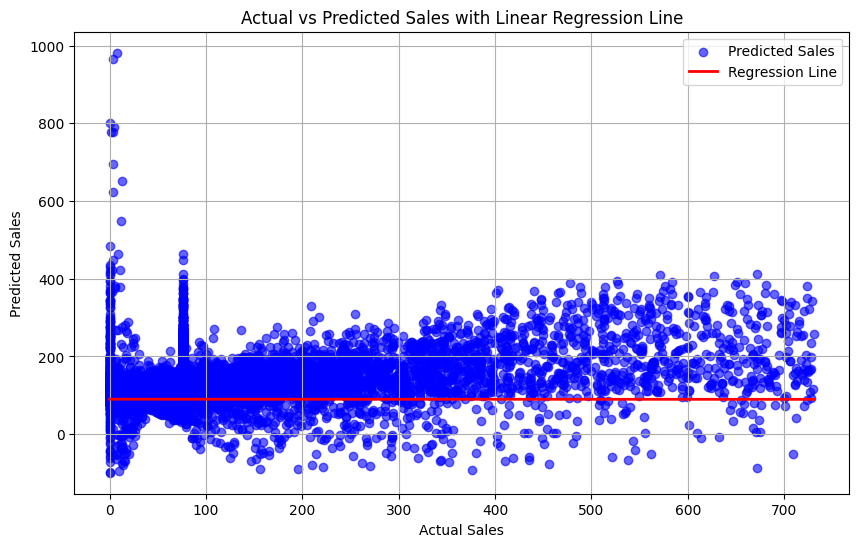

In [ ]:
# visualising regression line
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted Sales')

x_values = np.linspace(min(y_test), max(y_test), 100)
y_line = model.intercept_ + model.coef_[0] * x_values

plt.plot(x_values, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales with Linear Regression Line")
plt.legend()
plt.grid()
plt.show()

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 99.16927342756257
Mean Squared Error: 19957.418543499723
Root Mean Squared Error: 141.27072783666023


In [ ]:

predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
predictions_df.to_excel('sales_predictions.xlsx', index=False)

print("Predictions saved to 'sales_predictions.xlsx'.")


Predictions saved to 'sales_predictions.xlsx'.
